### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма:
strategy, maxiter, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### Допзадание

Найти множество параметров (strategy=..., maxiter=..., ..., updating=...), которые требуют минимального количества итераций.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

In [4]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result


     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.])

strategystr, optional
The differential evolution strategy to use. Should be one of:

‘best1bin’

‘best1exp’

‘rand1exp’

‘randtobest1exp’

‘currenttobest1exp’

‘best2exp’

‘rand2exp’

‘randtobest1bin’

‘currenttobest1bin’

‘best2bin’

‘rand2bin’

‘rand1bin’

The default is ‘best1bin’.

maxiterint, optional
The maximum number of generations over which the entire population is evolved. The maximum number of function evaluations (with no polishing) is: (maxiter + 1) * popsize * len(x)
popsizeint, optional
A multiplier for setting the total population size. The population has popsize * len(x) individuals (unless the initial population is supplied via the init keyword).

tolfloat, optional
Relative tolerance for convergence, the solving stops when np.std(pop) <= atol + tol * np.abs(np.mean(population_energies)), where and atol and tol are the absolute and relative tolerance respectively.

mutationfloat or tuple(float, float), optional
The mutation constant. In the literature this is also known as differential weight, being denoted by F. If specified as a float it should be in the range [0, 2]. If specified as a tuple (min, max) dithering is employed. Dithering randomly changes the mutation constant on a generation by generation basis. The mutation constant for that generation is taken from U[min, max). Dithering can help speed convergence significantly. Increasing the mutation constant increases the search radius, but will slow down convergence.
recombinationfloat, optional
The recombination constant, should be in the range [0, 1]. In the literature this is also known as the crossover probability, being denoted by CR. Increasing this value allows a larger number of mutants to progress into the next generation, but at the risk of population stability.

updating{‘immediate’, ‘deferred’}, optional
If 'immediate', the best solution vector is continuously updated within a single generation [4]. This can lead to faster convergence as trial vectors can take advantage of continuous improvements in the best solution. With 'deferred', the best solution vector is updated once per generation. Only 'deferred' is compatible with parallelization, and the workers keyword can over-ride this option.


In [12]:
strateg = ['best1bin','best1exp','rand1exp','randtobest1exp','currenttobest1exp','best2exp','rand2exp','randtobest1bin','currenttobest1bin','best2bin','rand2bin','rand1bin']
nit_st = np.array([])
for str in strateg:
    result = differential_evolution(ackley, bounds, seed=42,strategy=str)
    nit_st = np.append(nit_st,result.nit)
    print(str,result.nit)


best1bin 89
best1exp 143
rand1exp 246
randtobest1exp 158
currenttobest1exp 1000
best2exp 246
rand2exp 363
randtobest1bin 105
currenttobest1bin 1000
best2bin 166
rand2bin 231
rand1bin 165


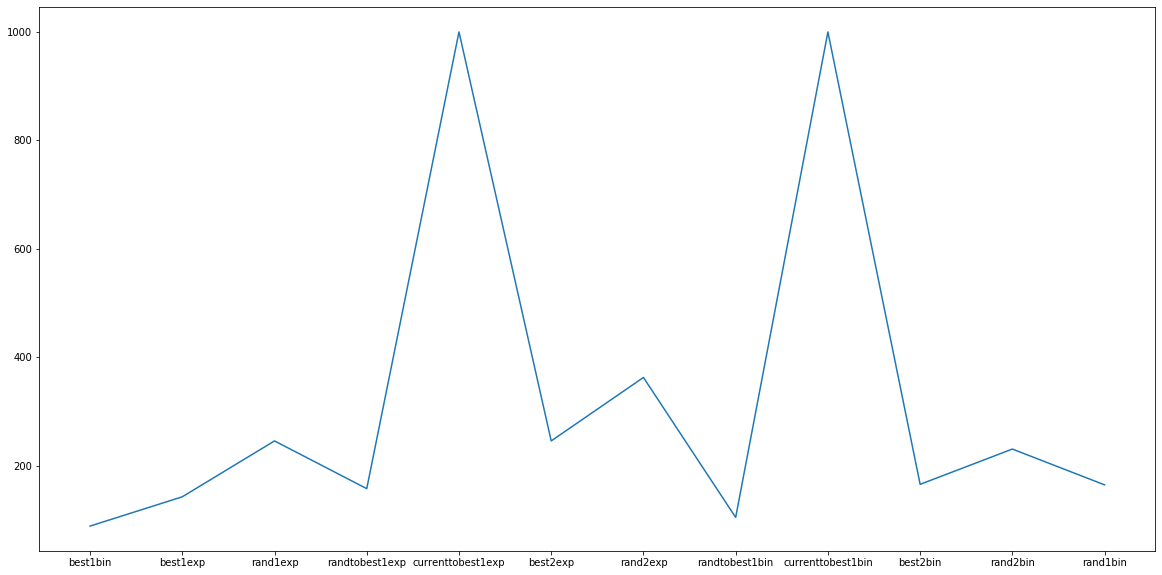

In [11]:
plt.figure(figsize=(20,10))   
plt.plot(strateg, nit_st)
plt.show()    

In [18]:
param_max = [10,200,300,400,500]
nit_max = np.array([])
for str in param_max:
    result = differential_evolution(ackley, bounds, seed=42,maxiter=str)
    nit_max = np.append(nit_max,result.nit)
    print(str,result.nit)

10 10
200 89
300 89
400 89
500 89


In [26]:
param_pop = [5,10,11,12,15,16,17,50,200]
nit_pop = np.array([])
for str in param_pop:
    result = differential_evolution(ackley, bounds, seed=42,popsize=str)
    nit_pop = np.append(nit_pop,result.nit)
    print(str,result.nit)

5 102
10 99
11 88
12 97
15 89
16 101
17 98
50 98
200 93


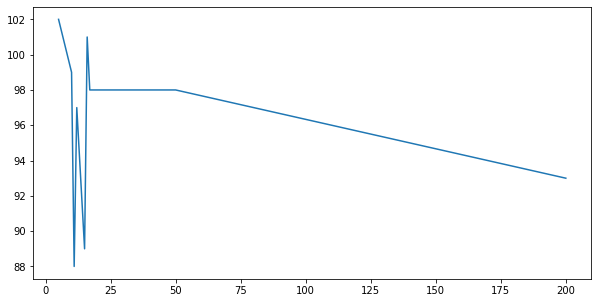

In [28]:
plt.figure(figsize=(10,5))   
plt.plot(param_pop, nit_pop)
plt.show()    

In [31]:
param_tol = [0,0.001,0.01,0.5,1]
nit_tol = np.array([])
for str in param_tol:
    result = differential_evolution(ackley, bounds, seed=42,tol=str)
    nit_tol = np.append(nit_tol,result.nit)
    print(str,result.nit)

0 89
0.001 89
0.01 89
0.5 1
1 1


In [34]:
param_mut = [[0,1],[0.5,1],[1.1],[0.5,1.9]]
nit_mut = np.array([])
for str in param_mut:
    result = differential_evolution(ackley, bounds, seed=42,mutation=str)
    nit_mut = np.append(nit_mut,result.nit)
    print(str,result.nit)

[0, 1] 48
[0.5, 1] 89
[1.1] 186
[0.5, 1.9] 162


In [40]:
param_rec = [0,0.001,0.01,0.2,0.5,0.6,0.7,0.8,1]
nit_rec = np.array([])
for str in param_rec:
    result = differential_evolution(ackley, bounds, seed=42,recombination=str)
    nit_rec = np.append(nit_rec,result.nit)
    print(str,result.nit)

0 1000
0.001 1000
0.01 365
0.2 117
0.5 106
0.6 97
0.7 89
0.8 84
1 81


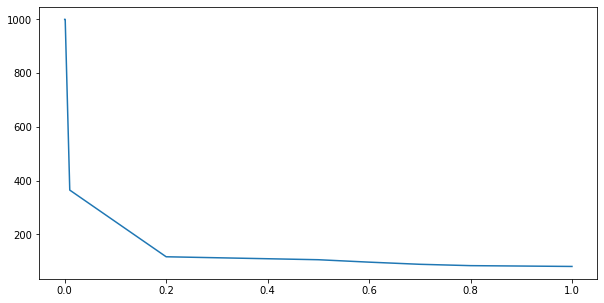

In [41]:
plt.figure(figsize=(10,5))   
plt.plot(param_rec, nit_rec)
plt.show()    

In [42]:
param_upd = ['immediate','deferred']
nit_upd = np.array([])
for str in param_upd:
    result = differential_evolution(ackley, bounds, seed=42,updating=str)
    nit_upd = np.append(nit_upd,result.nit)
    print(str,result.nit)


immediate 89
deferred 125
